In [9]:
# from desktop w/ gpu
import torch
import numpy as np
import cv2
import time
import os
from enum import Enum
from multipledispatch import dispatch
import mrs3 as mr
import interpolation as inter
import utils

%load_ext autoreload
%autoreload 2

lenna_path = 'Lenna_(test_image).png'

print(torch.cuda.is_available())
print(torch.cuda.get_device_name(device = 0))
print(torch.cuda.device_count())
print(torch.backends.cudnn.version())



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
True
NVIDIA GeForce RTX 3060
1
91000


In [1]:
# from laptop w/o gpu
import numpy as np
import cv2
import time
import os
from enum import Enum
from PIL import Image
from utils import *
import mrs3 as mr

print(cv2.__version__)

%load_ext autoreload
%autoreload 2

4.11.0


In [28]:
mr.compress_img_mult_tgs('Downloads/screenshot.png', 'testf', scaler=4, roi_mode=mr.ROI_POLYGON)

original filesize: 1489508
downscaled filesize: 87345
roi filesize: 269123
roi bin filesize: 1126
config filesize: 96
total filesize: 357690
compression ratio: 0.24013969713489286


In [29]:
mr.restore_img_mult_tgs('testf', mr.EDSR, 'testf')

2.9365286827087402 sec taken


In [ ]:
mr.compress_img_pkg('Downloads/500x500.png', 'testpkg', filename='lenna.pkg', scaler=4, roi_mode=mr.ROI_POLYGON)

original filesize: 325420
downscaled filesize: 31065
roi filesize: 36042
roi bin filesize: 893
config filesize: 203
total filesize: 68203
compression ratio: 0.20958453690615206
pkg file: 68343


In [24]:
mr.compress_img_pkg_imgpresso('Downloads/500x500.png', 'testpkgimgpresso', filename='lenna.pkg', scaler=4, roi_mode=mr.ROI_POLYGON)

original filesize: 325420
downscaled filesize: 31065
roi filesize: 38008
roi bin filesize: 996
config filesize: 203
total filesize: 70272
compression ratio: 0.21594247434085181
pkg file: 57623


In [26]:
print(57623/325420)
print(57623/70272)

0.1770727060414234
0.8199994307832422


In [27]:
mr.compress_img_pkg('Downloads/screenshot.png', 'testpkg', filename='screenshot.pkg', scaler=4, roi_mode=mr.ROI_POLYGON)

original filesize: 1489508
downscaled filesize: 87345
roi filesize: 278691
roi bin filesize: 1185
config filesize: 96
total filesize: 367317
compression ratio: 0.24660290512034846
pkg file: 367393


In [30]:
mr.compress_img_mult_tgs('sample-images-png/1920x1080.png', 'testf', scaler=4, roi_mode=mr.ROI_POLYGON)

original filesize: 864398
downscaled filesize: 219310
roi filesize: 119632
roi bin filesize: 1608
config filesize: 152
total filesize: 340702
compression ratio: 0.3941494543023006


In [31]:
mr.restore_img_mult_tgs('testf', mr.EDSR, 'testf')

3.7017974853515625 sec taken


In [ ]:
# from laptop w/o gpu
import numpy as np
import cv2
import time
import os
from enum import Enum
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image
from utils import *

print(cv2.__version__)

%load_ext autoreload
%autoreload 2

4.11.0


In [10]:
import cv2
import time



img = cv2.imread('Lenna_(test_image).png')

sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel(f'models/EDSR_x4.pb')

# GPU 가속화를 위한 설정
sr.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
sr.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

sr.setModel('edsr', 4)

t1 = time.time()
result = sr.upsample(img)

t2 = time.time()
print(t2 - t1)

cv2.imshow('Original Image', img)
cv2.imshow('Super Resolution Image', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

3.312225103378296


In [4]:
cv2.imshow('Original Image', img)
cv2.imshow('Super Resolution Image', result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
img = cv2.imread('Lenna_(test_image).png')
img = img[200:400, 200:400]

In [21]:
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel('models/EDSR_x4.pb')
sr.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
sr.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
sr.setModel('edsr', 4)
result = sr.upsample(img)

# cv2.imshow('res', result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [4]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr.readModel('models/EDSR_x3.pb')

In [4]:
def foo():
    return None, None

a, b = foo()
print(a)
print(b)


None
None


# TEST

In [11]:
output_path = 'testfiles'
img_path = 'sample-images-png/1920x1080.png'
scaler = 4

original_part_path = f"{output_path}/original_part.png"
downscaled_part_path = f"{output_path}/downscaled_part.png"

original_part, original_part_loc = select_polygon_roi(img_path)
downscaled_part = downscale_img(img_path, scaler)

cv2.imwrite(original_part_path, original_part)
cv2.imwrite(downscaled_part_path, downscaled_part)

True

# Original image

In [9]:
original_img = cv2.imread(img_path)
cv2.imshow('original', original_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
cv2.imshow('downscaled_part', downscaled_part)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
cv2.imshow('original_part', original_part)
cv2.waitKey(0)
cv2.destroyAllWindows()

# File sizes

In [12]:
original_filesize = os.path.getsize(img_path)
original_part_filesize = os.path.getsize(original_part_path)
downscaled_part_filesize = os.path.getsize(downscaled_part_path)

print(f"original file: {original_filesize}")
print(f"original part file: {original_part_filesize}")

print(f"downscaled part file: {downscaled_part_filesize}")

print(f"compressed ratio: {original_part_filesize / original_filesize} + {downscaled_part_filesize / original_filesize} = {(original_part_filesize + downscaled_part_filesize) / original_filesize}")


original file: 864398
original part file: 78706
downscaled part file: 254876
compressed ratio: 0.09105296402814445 + 0.294859543867524 = 0.38591250789566844


# Restored by cv2.resize

In [ ]:
# numpy array[row #, col #] 순

restored_img_by_resize = cv2.imread(downscaled_part_path)
original_h, original_w = restored_img_by_resize.shape[0]*scaler, restored_img_by_resize.shape[1]*scaler
restored_img_by_resize = cv2.resize(restored_img_by_resize, (original_w, original_h), interpolation=cv2.INTER_CUBIC)

cv2.imshow('restored_img_by_resize_only', restored_img_by_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

# restored_img_by_resize[original_part_loc[], c_from:c_to] = cv2.imread(original_part_path)

cv2.imshow('restored_img_by_resize_mrs3', restored_img_by_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Restored by edsr

In [ ]:
restored_img_by_edsr = upscale_by_edsr(downscaled_part_path, scaler)

cv2.imshow('restored_img_by_edsr_only', restored_img_by_edsr)
cv2.waitKey(0)
cv2.destroyAllWindows()

# restored_img_by_edsr[r_from:r_to, c_from:c_to] = cv2.imread(original_part_path)

r_from, r_to, c_from, c_to = original_part_loc
tmp = restored_img_by_edsr[r_from:r_to, c_from:c_to]
original_part_read = cv2.imread(original_part_path)

tmp = combine_images(original_part_read, tmp)
restored_img_by_edsr[r_from:r_to, c_from:c_to] = tmp


cv2.imshow('restored_img_by_edsr_mrs3', restored_img_by_edsr)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
cv2.imshow('restored_img_by_edsr_mrs3', restored_img_by_edsr)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [89]:
# 저해상도 -> 원본 사이즈니까
# 기존 한계가 500x500 이므로
# 2000x2000 을 4배 스케일링하는 것까지 커버가능

# cv2.imwrite('restored_img_by_resize.png', restored_img_by_resize)
cv2.imwrite('restored_img_by_edsr.png', restored_img_by_edsr)

True

합칠 떄 [0 0 0] 은 스킵하도록 해야함(shape 유지)

In [ ]:
image_path = ''

다른 딥러닝 모델 
- 윤곽/경계
- YOLO
- DEEPSORT
- TRACKING



수정 필요한 거
- 여러개 선택
- 원본 부분 이미지 합칠 때 경계의 부자연스러움 처리(블렌딩, 브러쉬처럼 특정부분 weight 바꾸기)

In [ ]:
img_path = 'Lenna_(test_image).png'


# 경계 블렌딩

우선 아래 방법 적용하지 않은 상태로 구현

- 원본 파트에서 경계에서 떨어진 거리에 따라 블렌딩 비율 다르게
- 경계에 가까울수록 downscaled->upscaled 이미지 비율을 높게 잡고
- 경계에서 멀어질수록 original part 이미지 비율을 높게 설정하여 블렌딩
- 일정 거리 이상으로 멀어지면 100% 원본파트
- 선형, sigmoid 등 함수로 interpolation

In [ ]:
class blend_mode(Enum):
    alpha = 0
    poisson = 1
    laplacian = 2
    grad = 3
    dl = 4

def blending_two_images(src, target, mask, mode = blend_mode.poisson, center = (0, 0)):
    match mode:
        case blend_mode.alpha:
            result = cv2.addWeighted(src, 0.7, target, 0.3, 0, mask=mask)
        case blend_mode.poisson:
            result = cv2.seamlessClone(
                src, target, mask, center, cv2.MIXED_CLONE
            )
        case blend_mode.laplacian:
            # laplacian dist
            return
        case blend_mode.grad:
            # gradient
            return
        case blend_mode.dl:
            # dl model
            return

    return result

In [ ]:

# from keras_cv.models import (
#     ResNet18, ResNet50, YOLOV8Detector, StableDiffusion,
#     DeepLabV3Plus, RetinaNet, ImageClassifier
# )


# lr_image = cv2.imread('Lenna_(test_image).png')
# model = EDSR(scale_factor=4)  # ×4 초해상화
# hr_image = model.predict(lr_image)


2025-04-28 16:01:01.351157: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-28 16:01:01.375552: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-28 16:01:01.375576: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-28 16:01:01.376312: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-28 16:01:01.380914: I tensorflow/core/platform/cpu_feature_guar

Using TensorFlow backend


ImportError: cannot import name 'ResNet18' from 'keras_cv.models' (/home/primarina314/anaconda3/envs/mrs3/lib/python3.11/site-packages/keras_cv/api/models/__init__.py)

In [ ]:
# Hugging Face 모델 다운로드
import keras
# model = keras.models.load_model("https://huggingface.co/keras-io/EDSR")


UnimplementedError: File system scheme 'https' not implemented (file: 'https://huggingface.co/keras-io/EDSR')

In [ ]:
from keras_cv.models import YOLOV8Detector
from keras.applications.resnet50 import ResNet50
# model = YOLOV8Detector()
# print(model.device)  # 모델이 할당된 장치 출력


In [5]:
# Python 인터프리터 또는 스크립트 내에서
import os
print(os.environ.get('LD_LIBRARY_PATH'))


/home/primarina314/anaconda3/envs/mrs3/lib/python3.11/site-packages/cv2/../../lib64::/usr/local/cuda-12.2/lib64/


In [9]:
import keras_cv.src.utils
import keras_cv.src.models

model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolov8n_pascalvoc", 
    bounding_box_format="xyxy" 
)

ValueError: Unknown preset identifier. A preset must be a one of:
1) a built in preset identifier like `'mobilenet_v3_small'`
2) a Kaggle Models handle like `'kaggle://keras/mobilenetv3/keras/mobilenet_v3_small'`
3) a path to a local preset directory like `'./mobilenet_v3_small`
Use `print(cls.presets.keys())` to view all built-in presets for API symbol `cls`.
Received: preset='yolov8n_pascalvoc'

In [14]:
import keras_cv
from tensorflow import keras # Keras import 필요
import numpy as np
from keras_cv.utils import image # 이미지 로드/저장 유틸리티

# 1. 모델 로드 (예: Pascal VOC 데이터셋으로 학습된 yolov8n)
# bounding_box_format은 데이터셋 라벨 형식과 맞춰야 함 (일반적으로 "xyxy")
model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolov8n_pascalvoc", 
    bounding_box_format="xyxy" 
)

# 2. 이미지 로드 및 전처리 (Preset이 전처리 레이어 포함)
image = keras.utils.load_img("Lenna_(test_image).png") 
image = np.array(image)
input_batch = np.expand_dims(image, axis=0) # 배치 차원 추가

# 3. 추론 수행
# predict()는 모델 내부의 전처리 및 후처리(NMS 등)를 포함
y_pred = model.predict(input_batch)

# y_pred 형식: 딕셔너리 {'boxes': ..., 'classes': ..., 'confidence': ...}
# bounding_box_format에 따라 box 좌표 형식이 달라짐

# 4. 결과 시각화 (KerasCV 유틸리티 사용)
keras_cv.visualization.plot_bounding_box_gallery(
    input_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xyxy",
    class_mapping=model.presets["yolov8n_pascalvoc"].classes, # Preset에 포함된 클래스 매핑 사용
    show=True
)


ModuleNotFoundError: No module named 'keras_cv.utils'

In [2]:
std_model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


2025-04-28 20:07:58.167092: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-28 20:07:58.167172: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-28 20:07:58.167192: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-28 20:07:58.167375: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-04-28 20:07:58.167389: I tensorflow/core/common_runtime/gpu/gpu

50/50 [==============================] - 78s 929ms/step


2025-04-28 20:09:50.443709: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng33{k2=2,k6=2,k13=1,k14=0,k22=1} for conv (f32[3,256,256,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[3,256,256,256]{3,2,1,0}, f32[256,256,3,3]{3,2,1,0}, f32[256]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2025-04-28 20:09:50.517059: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.073929793s
Trying algorithm eng33{k2=2,k6=2,k13=1,k14=0,k22=1} for conv (f32[3,256,256,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[3,256,256,256]{3,2,1,0}, f32[256,256,3,3]{3,2,1,0}, f32[256]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","s

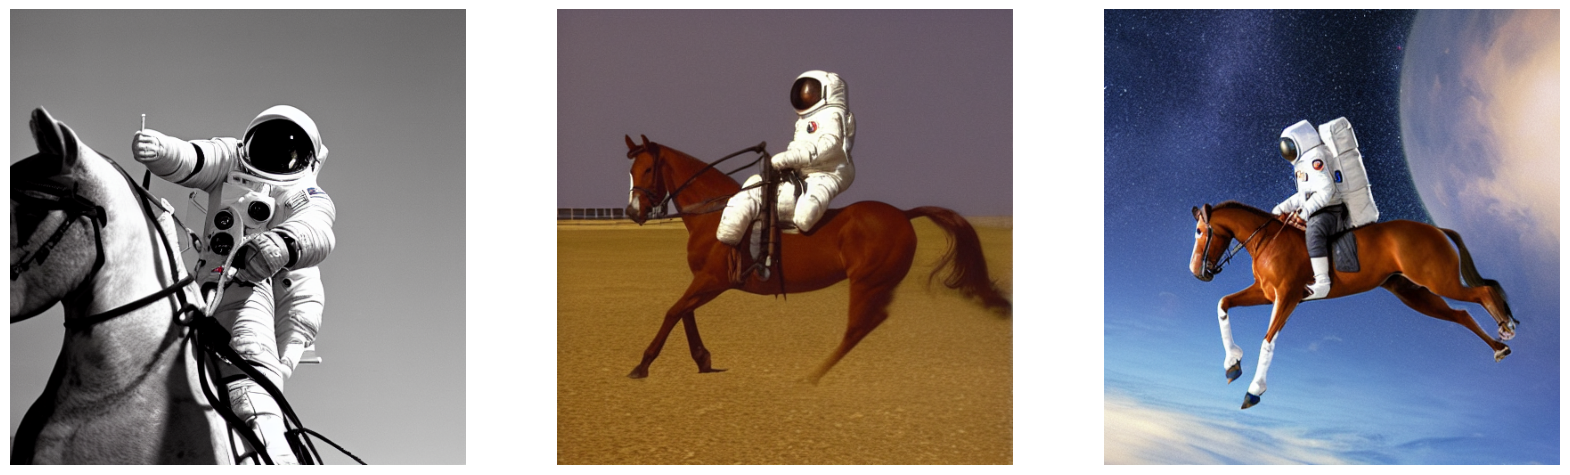

In [3]:
std_images = std_model.text_to_image("photograph of an astronaut riding a horse", batch_size=3)
plot_images(std_images)

# "photograph of an astronaut riding a horse"
# "photograph of a pig riding a chicken"

In [ ]:
import keras_cv

# EfficientNetV2 백본 로드
# backbone = keras_cv.models.EfficientNetV2Backbone.from_preset("efficientnetv2_b0_imagenet")

# YOLOv8 객체 탐지 모델 로드
# detector = keras_cv.models.YOLOV8Detector.from_preset("yolov8n_pascalvoc", bounding_box_format="xyxy")

# Stable Diffusion 이미지 생성 모델 로드
# sd = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

# https://github.com/keras-team/keras-cv
# 여기에 있는 모델 목록이 기본 제공 모델



In [ ]:
from tensorflow import keras

# Hugging Face 모델 다운로드
model = keras.models.load_model("https://huggingface.co/keras-io/EDSR")


In [8]:
# del std_model
import gc
gc.collect()

91343

In [10]:
from keras import backend as K

K.clear_session()

In [3]:
import mrs3 as mr

In [ ]:
mr.compress_img(img_path='Lenna_(test_image).png', output_path='mrmrmrout', scaler=4, roi_mode=mr.ROI_POLYGON, interpolation=mr.INTER_AREA)

original file: 473831
downscaled filesize: 35816
roi filesize: 33064
config filesize: 97
compression ratio: 0.1455729996559955


In [7]:
mr.restore_img(input_path='mrmrmrout', mrs3_mode=mr.EDSR, output_path='')

In [14]:
"""
3019/232733

401/69500

428/34384

758/125725

1716/127655

585/85001
"""
585/85001

0.006882271973270903

In [4]:
l = []
len(l)
l.append([])
l[0].append(3324)


In [5]:
print(l[0])

[3324]


In [6]:
contours = []
contour_num = 0

In [7]:
if len(contours) == contour_num:
    contours.append([])


In [10]:
contours[contour_num].append('asdf')

In [11]:
l = [3,23,5,4756,876,5446,765]
print(l[-1])

765


In [15]:
if l:
    print('asdf')

r = []
if r:
    print('zxcv')
else:
    print('xcvfzvcx')

asdf
xcvfzvcx


In [3]:
import os
os.path.getsize('models/EDSR_x4.pb') / 1024

37669.1943359375

In [2]:
img = cv2.imread('Lenna_(test_image).png')
print(img.itemsize)

1


In [ ]:
import pynvml
pynvml.nvmlInit()
device_count = pynvml.nvmlDeviceGetCount()

print(device_count)


1


In [4]:
for i in range(device_count):
    handle = pynvml.nvmlDeviceGetHandleByIndex(i)
    name = pynvml.nvmlDeviceGetName(handle)
    memory_info = pynvml.nvmlDeviceGetMemoryInfo(handle)
    utilization = pynvml.nvmlDeviceGetUtilizationRates(handle)
    
    print(f"GPU {i}: {name.decode('utf-8')}")
    print(f"Memory Total: {memory_info.total / 1024**2:.2f} MB")
    print(f"Memory Used: {memory_info.used / 1024**2:.2f} MB")
    print(f"Memory Free: {memory_info.free / 1024**2:.2f} MB")
    print(f"GPU Utilization: {utilization.gpu}%")
    print(f"Memory Utilization: {utilization.memory}%")
    print()

# NVML 종료
pynvml.nvmlShutdown()

GPU 0: NVIDIA GeForce RTX 3060
Memory Total: 12288.00 MB
Memory Used: 2329.94 MB
Memory Free: 9958.06 MB
GPU Utilization: 16%
Memory Utilization: 24%



In [ ]:
free_memory = torch.cuda.memory_reserved(0) - torch.cuda.memory_allocated(0)

# print(f"Free GPU Memory: {free_memory / 1024 ** 2:.2f} MB")

0